In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multimodal Retrieval Augmented Generation (RAG) using Vertex AI Gemini API

<table align="left">
  <td style="text-align: center">
    <a href="https://github.com/Analystics-AI/Guideline_RAG/tree/main/intro_rag.ipynb">
      <img width="32px" src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>  
</table>

| | | 
|-|-|
|Author(s) | [Manu Weissel](https://www.linkedin.com/in/man%C3%BA-weissel-618127211/) |

## Overview
Retrieval-Augmented Generation (RAG) is a groundbreaking technique in the field of natural language processing (NLP) that merges the extensive knowledge capacity of large language models (LLMs) with the specificity and relevance of information retrieval systems. By uploading relevant documents, RAG models can generate responses that are not only contextually accurate but also deeply informed by relevant external data sources. 
Retrieval augmented generation (RAG) has become a popular paradigm for enabling LLMs to access external data and also as a mechanism for grounding to mitigate against hallucinations.

The RAG approach involves two main steps:

1. **Retrieval of Information:** The model searches a large dataset or corpus to find pieces of information that are relevant to the input query. This dataset can be anything from the entirety of Wikipedia to a specialized database tailored to a specific domain.
2. **Generation of Responses:** The model then combines this retrieved information with the original query to generate a response. This process leverages the power of generative models, like GPT (Generative Pre-trained Transformer), BERT (Bidirectional and Auto-Regressive Transformers) or Gemini, which are trained to produce coherent and contextually relevant text based on the inputs they receive.

### Gemini
Gemini is a family of generative AI models developed by Google DeepMind that is designed for multimodal use cases. The Gemini API gives you access to the Gemini 1.0 Pro Vision and Gemini 1.0 Pro models.

### Comparing text-based and multimodal RAG
Multimodal RAG offers several advantages over text-based RAG:

1. **Enhanced knowledge access:** Multimodal RAG can access and process both textual and visual information, providing a richer and more comprehensive knowledge base for the LLM.
2. **Improved reasoning capabilities:** By incorporating visual cues, multimodal RAG can make better informed inferences across different types of data modalities.

This notebook shows you how to use RAG with Vertex AI Gemini API, [text embeddings](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/text-embeddings), and [multimodal embeddings](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/multimodal-embeddings), to build a document search engine.

Through hands-on examples, you will discover how to construct a multimedia-rich metadata repository of your document sources, enabling search, comparison, and reasoning across diverse information streams. Summarised you will learn how to perform multimodal RAG where you can perform Q&A over a financial document filled with both text and images.

# Set up Vertex AI


This tutorial uses components of Google Cloud:

- Vertex AI

In order to access Vertex AI and create a free-trial account, following steps are necessary:.
1. Enter your Google credentials [here](https://console.cloud.google.com/freetrial?hl=de&facet_utm_source=%28direct%29&facet_utm_campaign=%28direct%29&facet_utm_medium=%28none%29&facet_url=https%3A%2F%2Fcloud.google.com%2Fvertex-ai%2Fpricing&facet_id_list=%5B39300012%2C+39300022%2C+39300118%2C+39300195%2C+39300251%2C+39300317%2C+39300320%2C+39300326%2C+39300345%2C+39300354%2C+39300364%2C+39300373%2C+39300412%2C+39300421%2C+39300436%2C+39300471%2C+39300488%2C+39300496%2C+39300498%5D&_ga=2.268870644.400606400.1709743568-1134076064.1709743561). If you don't have a google Account you need to create one.
2. You will have to enter your credit card information, but there will be NO costs.
3. Follow the required steps to use the Google Cloud Platform services. 
4. You will be able to use Vertex AI for the next 90 days.
5. Click on following Icon to open this code in you google vertex AI workbench.


<table align="left">
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/Analystics-AI/Guideline_RAG/blob/main/intro_rag.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
</table>

6. On the right side of the page you can a Tutorial to create a user managed notebook instance. Follow the mentioned steps.
- Please start the tutorial and then stay at the first step. Since your project 'My First Project' was already created, you can proceed to the second part of the first step. Don't upgrade your Free Trail if you want to avoid uncessary costs. 
- Press 'Enable the Notebooks API'. This can take up to 5 minutes. DON'T rush to the next step. 
- After enableing the Notebooks API the layout should change and after scrolling down you should be able to press create. Do not proceed with any other steps . 
7. After proceeding with these steps a notebook with JupyterLab should open itself. After loading click on 'OPEN', confirm the deployment and then you are ready to go!  .



## Please proceed if and ONLY if you have set up Vertex AI in JupyterLab on Google Cloud Workspace!


### Objectives

This notebook provides a guide to building a document search engine using multimodal retrieval augmented generation (RAG), step by step:

1. Extract and store metadata of documents containing both text and images, and generate embeddings the documents
2. Search the metadata with text queries to find similar text or images
3. Search the metadata with image queries to find similar images
4. Using a text query as input, search for contexual answers using both text and images

## Getting Started


### Install Vertex AI SDK for Python and other dependencies


In [38]:
! pip3 install --upgrade --user google-cloud-aiplatform pymupdf
! pip install gdown
! pip install Gensim
! pip install spacy
! pip install nltk
! python -m spacy download en_core_web_lg 
! pip install scikit-learn


### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel. You only need to do this the first time you access the notebook. 

In [2]:
# Restart kernel after installs so that your environment can access the new packages
import IPython
import time

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The notebook kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>



### Define Google Cloud project information


In [39]:
# Define project information

import sys

PROJECT_ID = ""  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# if not running on colab, try to get the PROJECT_ID automatically
if "google.colab" not in sys.modules:
    import subprocess

    PROJECT_ID = subprocess.check_output(
        ["gcloud", "config", "get-value", "project"], text=True
    ).strip()

print(f"Your project ID is: {PROJECT_ID}")

In [2]:
import sys

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Import libraries


In [3]:
from IPython.display import Markdown, display
from vertexai.generative_models import (
    Content,
    GenerationConfig,
    GenerationResponse,
    GenerativeModel,
    HarmCategory,
    HarmBlockThreshold,
    Image,
    Part,
)

### Load the Gemini 1.0 Pro and Gemini 1.0 Pro Vision model


In [49]:
text_model = GenerativeModel("gemini-1.0-pro")
multimodal_model = GenerativeModel("gemini-1.0-pro-vision")

### Download custom Python modules and utilities

The cell below will download some helper functions needed for this notebook, to improve readability. You can also view the code (`intro_multimodal_rag_utils.py`) directly on [Github](https://raw.githubusercontent.com/manuyweissel/Master_Thesis_RAG_Guideline/main/utils/intro_multimodal_rag_utils.py).

In [ ]:
import os
import urllib.request
import sys

if not os.path.exists("utils"):
    os.makedirs("utils")


# download the helper scripts from utils folder
url_prefix = "https://raw.githubusercontent.com/Analystics-AI/Guideline_RAG/blob/main/utils/"
files = ["intro_multimodal_rag_utils.py"]

for fname in files:
    urllib.request.urlretrieve(f"{url_prefix}/{fname}", filename=f"utils/{fname}")

#### Get documents and images from GCS

In [5]:
# download documents and images used in this notebook
import gdown
!gdown --folder https://drive.google.com/drive/folders/1jy-bwju_T6aOA4Ym69oswhbmD5HNHo48
print("Download completed")

Building synchronization state...
Starting synchronization...
Download completed


## Building metadata of documents containing text and images

### The data

The source data that you will use in this notebook is the [BMW Earning Call Transcript](https://drive.google.com/file/d/1ntmUsw_k2kOAsLjMoC8twZYo6rM_yHn_/view?usp=sharing) from the first two quarters in 2023, which provides a comprehensive overview of the company's financial performance, business operations, management, and risk factors.

### Import helper functions to build metadata

Before building the multimodal RAG system, it's important to have metadata of all the text and images in the document. For references and citations purposes, the metadata should contain essential elements, including page number, file name, image counter, and so on. Hence, as a next step, you will generate embeddings from the metadata, which will is required to perform similarity search when quering the data.

In [6]:
from utils.intro_multimodal_rag_utils import get_document_metadata

### Extract and store metadata of text and images from a document

You just imported a function called `get_document_metadata()`. This function extracts text and image metadata from a document, and returns two dataframes, namely *text_metadata* and *image_metadata*, as outputs. If you want to find out more about how `get_document_metadata()` function is implemented using Gemini and the embedding models, you can take look at the [source code](https://raw.githubusercontent.com/manuyweissel/Master_Thesis_RAG_Guideline/main/utils/intro_multimodal_rag_utils.py) directly.

The reason for extraction and storing both text metadata and image metadata is that just by using either of the two alone is not sufficient to come out with a relevent answer. For example, the relevant answers could be in visual form within a document, but text-based RAG won't be able to take into consideration of the visual images. You will also be exploring this example later in this notebook.


At the next step, you will use the function to extract and store metadata of text and images froma document. Please note that the following cell may take a few minutes to complete:

Note: 

The current implementation works best: 

1) if your documents are a combination of text and images. 
2) if the tables in your documents are available as images. 
3) if the images in the document don't require too much context. 

Additionally, 

1) If you want to run this on text-only documents, use normal RAG
2) If your documents contain particular domain knowledge, pass that information in the prompt below. 

In [7]:
# Specify the PDF folder with multiple PDF

# pdf_folder_path = "/content/data/" # if running in Google Colab/Colab Enterprise
pdf_folder_path = "data/"  # if running in Vertex AI Workbench.

# Specify the image description prompt. Change it
image_description_prompt = """Explain what is going on in the image.
If it's a table, extract all elements of the table.
If it's a graph, explain the findings in the graph.
Do not include any numbers that are not mentioned in the image.
"""

# Extract text and image metadata from the PDF document
text_metadata_df, image_metadata_df = get_document_metadata(
    multimodal_model,  # we are passing gemini 1.0 pro vision model
    pdf_folder_path,
    image_save_dir="images",
    image_description_prompt=image_description_prompt,
    embedding_size=1408,
    # add_sleep_after_page = True, # Uncomment this if you are running into API quota issues
    # sleep_time_after_page = 5,
    # generation_config = # see next cell
    # safety_settings =  # see next cell
)

print("\n\n --- Completed processing. ---")



 Processing the file: --------------------------------- data/google-10k-sample-part1.pdf 


Processing page: 1
Processing page: 2
Extracting image from page: 2, saved as: images/google-10k-sample-part1.pdf_image_1_0_11.jpeg
Processing page: 3
Extracting image from page: 3, saved as: images/google-10k-sample-part1.pdf_image_2_0_15.jpeg
Processing page: 4
Extracting image from page: 4, saved as: images/google-10k-sample-part1.pdf_image_3_0_18.jpeg
Processing page: 5
Extracting image from page: 5, saved as: images/google-10k-sample-part1.pdf_image_4_0_21.jpeg
Processing page: 6
Processing page: 7


 Processing the file: --------------------------------- data/google-10k-sample-part2.pdf 


Processing page: 1
Extracting image from page: 1, saved as: images/google-10k-sample-part2.pdf_image_0_0_6.jpeg
Extracting image from page: 1, saved as: images/google-10k-sample-part2.pdf_image_0_1_8.jpeg
Processing page: 2
Extracting image from page: 2, saved as: images/google-10k-sample-part2.pdf_ima

In [42]:
# # Parameters for Gemini API call.
# # reference for parameters: https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/gemini

# generation_config=  GenerationConfig(temperature=0.2, max_output_tokens=2048)

# # Set the safety settings if Gemini is blocking your content or you are facing "ValueError("Content has no parts")" error or "Exception occured" in your data.
# # ref for settings and thresholds: https://cloud.google.com/vertex-ai/docs/generative-ai/multimodal/configure-safety-attributes

# safety_settings = {
#                   HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
#                   HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
#                   HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
#                   HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
#                   }

# # You can also pass parameters and safety_setting to "get_gemini_response" function

#### Inspect the processed text metadata


The follow cell will produce a metadata table which describes the different parts of text metadata, including:

- **text**: the original text from the page
- **text_embedding_page**: the embedding of the original text from the page
- **chunk_text**: the original text divided into smaller chunks
- **chunk_number**: the index of each text chunk
- **text_embedding_chunk**: the embedding of each text chunk

In [8]:
text_metadata_df.head()

,file_name,page_num,text,text_embedding_page,chunk_number,chunk_text,text_embedding_chunk
0,google-10k-sample-part1.pdf,1,source: https://abc.xyz/assets/investor/static...,"[0.014991610310971737, -0.02919854037463665, -...",1,source: https://abc.xyz/assets/investor/static...,"[0.020192701369524002, -0.024254748597741127, ..."
1,google-10k-sample-part1.pdf,1,source: https://abc.xyz/assets/investor/static...,"[0.014991610310971737, -0.02919854037463665, -...",2,"of Record\nAs of December 31, 2021, there wer...","[0.020380821079015732, -0.02744361385703087, -..."
2,google-10k-sample-part1.pdf,2,Issuer Purchases of Equity Securities\nThe fol...,"[0.005613800138235092, -0.019585391506552696, ...",1,Issuer Purchases of Equity Securities\nThe fol...,"[0.005613800138235092, -0.019585391506552696, ..."
3,google-10k-sample-part1.pdf,3,Stock Performance Graphs\nThe graph below matc...,"[0.021363046020269394, -0.04906604439020157, -...",1,Stock Performance Graphs\nThe graph below matc...,"[0.021363046020269394, -0.04906604439020157, -..."
4,google-10k-sample-part1.pdf,4,The graph below matches Alphabet Inc. Class A'...,"[0.02950538508594036, -0.040373705327510834, -...",1,The graph below matches Alphabet Inc. Class A'...,"[0.02950538508594036, -0.040373705327510834, -..."


#### Inspect the processed image metadata

The following cell will produce a metadata table which describes the different parts of image metadata, including:
* **img_desc**: Gemini-generated textual description of the image.
* **mm_embedding_from_text_desc_and_img**: Combined embedding of image and its description, capturing both visual and textual information.
* **mm_embedding_from_img_only**: Image embedding without description, for comparison with description-based analysis.
* **text_embedding_from_image_description**: Separate text embedding of the generated description, enabling textual analysis and comparison.

In [9]:
image_metadata_df.head()

,file_name,page_num,img_num,img_path,img_desc,mm_embedding_from_text_desc_and_img,mm_embedding_from_img_only,text_embedding_from_image_description
0,google-10k-sample-part1.pdf,2,1,images/google-10k-sample-part1.pdf_image_1_0_1...,The table shows the number of shares repurcha...,"[0.0232484732, -0.000801357732, 0.0152797392, ...","[0.0232482236, -0.000801557675, 0.0152807888, ...","[-0.020209526643157005, -0.02174081653356552, ..."
1,google-10k-sample-part1.pdf,3,1,images/google-10k-sample-part1.pdf_image_2_0_1...,The image is a graph comparing the cumulative...,"[0.0068880273, 0.0237252265, -0.00902851, 0.02...","[0.00688949414, 0.0237254184, -0.00903047528, ...","[0.020604563876986504, -0.04141814634203911, -..."
2,google-10k-sample-part1.pdf,4,1,images/google-10k-sample-part1.pdf_image_3_0_1...,The image shows a graph comparing the cumulat...,"[0.00658545271, 0.0104535725, -0.00870148744, ...","[0.00658640964, 0.010453674, -0.00870055519, 0...","[0.019872529432177544, -0.0412788949906826, -0..."
3,google-10k-sample-part1.pdf,5,1,images/google-10k-sample-part1.pdf_image_4_0_2...,The image shows a table with the financial pe...,"[0.0166557152, 0.019989673, -0.0204030015, -0....","[0.0166557152, 0.019989673, -0.0204030015, -0....","[-0.012434903532266617, -0.04121846333146095, ..."
4,google-10k-sample-part2.pdf,1,2,images/google-10k-sample-part2.pdf_image_0_1_8...,The image shows a table with six columns. The...,"[0.0144322757, 0.0237871073, 0.0115118716, -0....","[0.0144321118, 0.0237871073, 0.0115116769, -0....","[0.0013615982607007027, -0.026370085775852203,..."


### Import the helper functions to implement RAG

You will be importing the following functions which will be used in the remainder of this notebook to implement RAG:

* **get_similar_text_from_query():** Given a text query, finds text from the document which are relevant, using cosine similarity algorithm. It uses text embeddings from the metadata to compute and the results can be filtered by top score, page/chunk number, or embedding size.
* **print_text_to_text_citation():** Prints the source (citation) and details of the retrieved text from the `get_similar_text_from_query()` function.
* **get_similar_image_from_query():** Given an image path or an image, finds images from the document which are relevant. It uses image embeddings from the metadata.
* **print_text_to_image_citation():** Prints the source (citation) and the details of retrieved images from the `get_similar_image_from_query()` fuction.
* **get_gemini_response():** Interacts with a Gemini model to answer questions based on a combination of text and image inputs.
* **display_images():**  Displays a series of images provided as paths or PIL Image objects.

In [10]:
from utils.intro_multimodal_rag_utils import (
    get_similar_text_from_query,
    print_text_to_text_citation,
    get_similar_image_from_query,
    print_text_to_image_citation,
    get_gemini_response,
    display_images,
)

## Multimodal retrieval augmented generation (RAG)

Let's bring everything together to implement multimodal RAG. You will use all the elements that you've explored in previous sections to implement the multimodal RAG. These are the steps:

* **Step 1:** The user gives a query in text format where the expected information is available in the document and is embedded in images and text.
* **Step 2:** Find all text chunks from the pages in the documents using a method similar to the one you explored in `Text Search`.
* **Step 3:** Find all similar images from the pages based on the user query matched with `image_description` using a method identical to the one you explored in `Image Search`.
* **Step 4:** Combine all similar text and images found in steps 2 and 3 as `context_text` and `context_images`.
* **Step 5:** With the help of Gemini, we can pass the user query with text and image context found in steps 2 & 3. You can also add a specific instruction the model should remember while answering the user query.
* **Step 6:** Gemini produces the answer, and you can print the citations to check all relevant text and images used to address the query.

### Step 1: User query

In [25]:
# this time we are not passing any images, but just a simple text query.

query = """What are the ten best questions to ask for the third quarter of BMW based on the first two conference calls Q&A sections? Write them in bullet points. """

### Step 2: Get all relevant text chunks

In [26]:
# Retrieve relevant chunks of text based on the query
matching_results_chunks_data = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=10,
    chunk_text=True,
)

### Step 3: Get all relevant images

In [27]:
# Get all relevant images based on user query
matching_results_image_fromdescription_data = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",
    image_emb=False,
    top_n=10,
    embedding_size=1408,
)

### Step 4: Create context_text and context_images

In [28]:
# combine all the selected relevant text chunks
context_text = []
for key, value in matching_results_chunks_data.items():
    context_text.append(value["chunk_text"])
final_context_text = "\n".join(context_text)

# combine all the relevant images and their description generated by Gemini
context_images = []
for key, value in matching_results_image_fromdescription_data.items():
    context_images.extend(
        ["Image: ", value["image_object"], "Caption: ", value["image_description"]]
    )

### Step 5: Pass context to Gemini

In [34]:
prompt = f""" Instructions: Compare the images and the text provided as Context: to answer multiple Question:
Make sure to think thoroughly before answering the question and put the necessary steps to arrive at the answer in bullet points for easy explainability.
If unsure, respond, "Not enough context to answer".

Context:
 - Text Context:
 {final_context_text}
 - Image Context:
 {context_images}

{query}

Answer:
"""

# Generate Gemini response with streaming output
response = get_gemini_response(
        multimodal_model,
        model_input=[prompt],
        stream=True,
        generation_config=GenerationConfig(temperature=0.4, max_output_tokens=2048),
    )
Markdown(response)

1. **What are the critical difference between various graphs for Class A Share?**
 - The first graph shows the cumulative 5-year total return of Alphabet Inc. Class A common stock, the S&P 500 Index, the NASDAQ Composite Index, and the RDG Internet Composite Index. The graph spans from December 2017 to December 2022.
 - The second graph shows the cumulative 5-year total return of Alphabet Inc. Class A common stock, the S&P 500 Index, the NASDAQ Composite Index, and the RDG Internet Composite Index. The graph spans from December 2016 to December 2021.
 - The third graph shows the basic and diluted net income per share for Class A, Class B, and Class C shares for the year ended December 31, 2019.

2. **Which index best matches Class A share performance closely where Google is not already a part? Explain the reasoning.**
 - The NASDAQ Composite Index best matches Class A share performance closely where Google is not already a part. This is because the NASDAQ Composite Index is a market-capitalization-weighted index of all Nasdaq-listed stocks, including Alphabet Inc. Class A shares. The S&P 500 Index and the RDG Internet Composite Index are both market-capitalization-weighted indices, but they do not include Alphabet Inc. Class A shares.

3. **Identify key chart patterns for Google Class A shares.**
 - The key chart patterns for Google Class A shares are:
    - A long-term uptrend
    - A series of higher highs and higher lows
    - A breakout from a resistance level at $1,000 per share
    - A consolidation period above $1,000 per share

4. **What is cost of revenues, oeprating expenses and net income for 2020. Do mention the percentage change**
 - Cost of revenues: $84,732 million
 - Operating expenses: $56,571 million
 - Net income: $40,269 million

5. **What was the effect of Covid in the 2020 financial year?**
 - The effect of COVID-19 on our financial results in March 2020 when, despite an increase in users' search activity, our advertising revenues declined compared to the prior year. This was due to a shift of user search activity to less commercial topics and reduced spending by our advertisers. For the quarter ended June 30, 2020 our advertising revenues declined due to the continued effects of COVID-19 and th

6. **What are the total revenues for APAC and USA for 2021?**
 - APAC: $46,123 million
 - USA: $117,854 million

7. **What is deferred income taxes?**
 - Deferred income taxes are the difference between the taxes that a company owes on its financial statements and the taxes that it pays to the government. This difference is due to the fact that companies are allowed to deduct certain expenses from their taxable income, even though those expenses are not yet deductible for financial reporting purposes. As a result, companies can have a deferred tax liability, which is the amount of taxes that they will owe in the future when the deferred expenses are no longer deductible.

8. **How do you compute net income per share?**
 - Net income per share is computed by dividing the net income by the weighted average number of shares outstanding.

9. **What drove percentage change in the consolidated revenue and cost of revenue for the year 2021 and was there any effect of Covid?**
 - The percentage change in the consolidated revenue for the year 2021 was driven by an increase in Google Services and Google Cloud revenues. The adverse effect of COVID-19 on 2020 advertising revenues also contributed to the year-over-year growth.
 - The percentage change in the cost of revenue for the year 2021 was driven by increases in TAC and content acquisition costs.

10. **What is the cause of 41% increase in revenue from 2020 to 2021 and how much is dollar change?**
 - The cause of the 41% increase in revenue from 2020 to 2021 was primarily driven by Google Services and Google Cloud. The adverse effect of COVID-19 on 2020 advertising revenues also contributed to the year-over-year growth.
 - The dollar change in revenue from 2020 to 2021 was $75,110 million.

### Step 6: Print citations and references

---------------Matched Images------------------



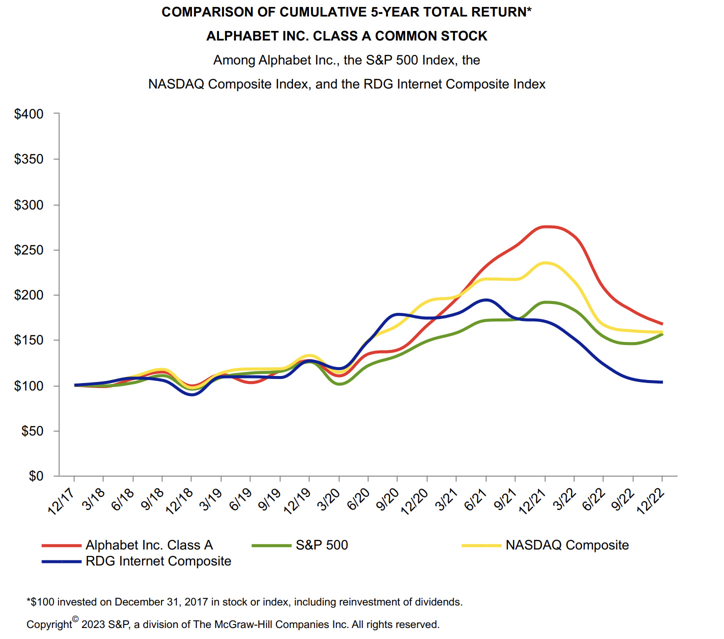

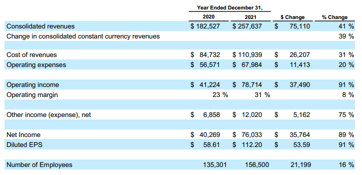

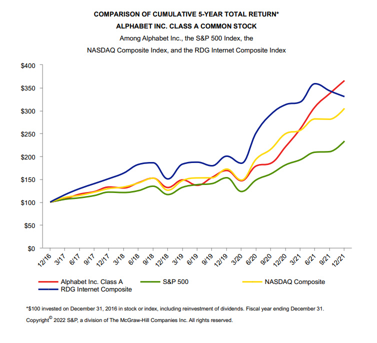

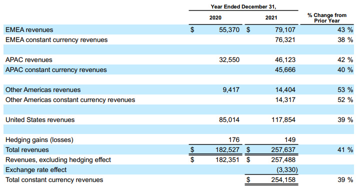

In [35]:
print("---------------Matched Images------------------\n")
display_images(
    [
        matching_results_image_fromdescription_data[0]["img_path"],
        matching_results_image_fromdescription_data[1]["img_path"],
        matching_results_image_fromdescription_data[2]["img_path"],
        matching_results_image_fromdescription_data[3]["img_path"],
    ],
    resize_ratio=0.5,
)

In [36]:
# Image citations. You can check how Gemini generated metadata helped in grounding the answer.

print_text_to_image_citation(
    matching_results_image_fromdescription_data, print_top=False
)

Citation 1: Mached image path, page number and page text: 

score:  0.75
file_name:  google-10k-sample-part1.pdf
path:  images/google-10k-sample-part1.pdf_image_3_0_18.jpeg
page number:  4
page text:  The graph below matches Alphabet Inc. Class A's cumulative 5-year total
stockholder return on common stock with the cumulative total returns of the S&P
500 index, the NASDAQ Composite index, and the RDG Internet Composite
index. The graph tracks the performance of a $100 investment in our common
stock and in each index (with the reinvestment of all dividends) from December
31, 2017 to December 31, 2022. The returns shown are based on historical
results and are not intended to suggest future performance.

image description:   The image shows a graph comparing the cumulative 5-year total return of Alphabet Inc. Class A common stock, the S&P 500 Index, the NASDAQ Composite Index, and the RDG Internet Composite Index. The graph spans from December 2017 to December 2022.

The cumulative 5-year

In [37]:
# Text citations

print_text_to_text_citation(
    matching_results_chunks_data,
    print_top=False,
    chunk_text=True,
)

Citation 1: Matched text: 

score:  0.79
file_name:  google-10k-sample-part1.pdf
page_number:  5
chunk_number:  1
chunk_text:  Executive Overview
The following table summarizes consolidated financial results for the years ended
December 31, 2020 and 2021 unless otherwise specified (in millions, except for
per share information and percentages):
 Revenues were $257.6 billion, an increase of 41%. The increase in
revenues was primarily driven by Google Services and Google Cloud. The
adverse effect of COVID-19 on 2020 advertising revenues also contributed
to the year-over-year growth.
 Cost of revenues was $110.9 billion, an increase of 31%, primarily driven
by increases in TAC and content acquisition costs.
 An overall increase in data centers and other operations costs was partially
offset by a reduction in depreciation expense due to the change in the
estimated useful life of our servers and certain network equipment. 
Operating expenses were $68.0 billion, an increase of 20%, primarily

## Evaluation

Evaluating a RAG system goes beyond simply measuring the final output. It delves into the effectiveness of each stage of the pipeline:

- Retrieval Component: Did it identify relevant and accurate information from the external source that addresses the user's query?
- Generation Component: Did the LLM effectively utilize the retrieved context to generate a high-quality response?

By focusing on these two aspects, we gain valuable insights into the overall performance of the RAG system. This allows us to:

- Identify weaknesses: Are irrelevant documents being retrieved? Is the LLM struggling to use the retrieved context effectively?
- Optimize performance: Can adjustments be made to the retrieval algorithm or the LLM training process to improve accuracy and coherence?

Benchmark against other systems: How does your RAG system compare to other approaches in terms of retrieval effectiveness and generation quality?

### Methods for RAG Evaluation

Several methods can be employed to evaluate a RAG system, focusing on both context and output:

Context-Based Evaluation:   Assesses the quality of retrieved information. This includes metrics like:
- Grounding/Faithfulness:   How well the generated response aligns with the retrieved context.
- Context Recall:           Whether the retrieved context contains the necessary information for an accurate answer.
- Cosine similarity 

Beyond these general methods, domain-specific metrics can be designed to cater to specific applications. For example, in a question-answering system, the average number of retrieved documents needed for the LLM to generate a correct answer might be a valuable metric.

## Test for Grounding/Faithfulness:

In [ ]:
from utils.intro_multimodal_rag_utils import compare_text

In [ ]:
# Example usage
text1 = response
text2 = matching_results_chunks_data[0]["chunk_text"]

results = compare_text(text1, text2)

print(f"Character Level Accuracy: {results['character_level_accuracy']:.2f}%")
print(f"Word Level Accuracy: {results['word_level_accuracy']:.2f}%")
print(f"Cosine Similarity: {results['cosine_similarity']}")

##  Context Recall:

In [ ]:
from utils.intro_multimodal_rag_utils import assess_context

In [ ]:
from collections import Counter
import nltk
nltk.download('punkt')

# Example usage (without spaCy)
context = str(matching_results_chunks_data.items())
question = query

assessment_results = assess_context(context, question)
print(assessment_results)

# Example usage (with spaCy for named entity recognition)
import spacy

nlp = spacy.load("en_core_web_lg")

context = str(matching_results_chunks_data.items())
question = query

assessment_results = assess_context(context, question, nlp)
print(assessment_results)

## Cosine Similarity 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Define your two texts
text1 = "Question_1"
text2 = "Question_2"

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Transform the texts to TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform([text1, text2])

# Compute the cosine similarity
similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

print(f"Cosine similarity between the two texts is: {similarity[0][0]}")


## Conclusions

Congratulations on making it through this multimodal RAG notebook!

While multimodal RAG can be quite powerful, note that it can face some limitations:

* **Data dependency:** Needs high-quality paired text and visuals.
* **Computationally demanding:** Processing multimodal data is resource-intensive.
* **Domain specific:** Models trained on general data may not shine in specialized fields like medicine.
* **Black box:** Understanding how these models work can be tricky, hindering trust and adoption.


Despite these challenges, multimodal RAG represents a significant step towards search and retrieval systems that can handle diverse, multimodal data.